# Example for making animations

This is not required for the class but it may be fun to try if you are interested!

In [1]:
!pip install -q celluloid

In [2]:
# Import libraries: 
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import celluloid
from celluloid import Camera
from scipy.special import expit
from matplotlib import gridspec

In [3]:
# Define logistic regression model: 
class LogisticRegression(object):
    def __init__(self,x,y, lr=0.01):
        self.lr=lr
        n=x.shape[1] # determine the number of independent variables
        self.w=np.ones((1,n))*(0) # initialize weight matrix and set weights to zero    
        self.b=0.5 # set starting value for b to 0.5 
        
    def predict(self,x): # returns prediction
        z=x@self.w.T  + self.b   # @: matrix multiplication 
        p=expit(z)  # logistic sigmoid function
        return p

    def cost(self, x,y): #cost function
        z=x@self.w.T  + self.b
        p=expit(z)
        return - np.mean(y*np.log(p) + (1-y)*np.log(1-p)) #Cross-entropy cost function
    
    def step(self,x,y):
        z=x@self.w.T  + self.b
        p=expit(z)
    
        # Partial derivatives:       
        dw= np.mean((p - y)*x, axis=0)    # dJ/dw
        db = np.mean(p-y)               # dJ/db
        self.w = self.w - dw*self.lr # update w
        self.b= self.b- db*self.lr  # update b
        
    def fit(self,x,y,numberOfEpochs=100000):
        # Create arrays to store weights, biases, costs, predicted y-values for plots..
            #... and predicted y-values for connection lines in: 
        self.AllWeights=np.zeros((numberOfEpochs, x.shape[1]))
        self.AllBiases=np.zeros((numberOfEpochs, x.shape[1]))
        self.AllCosts=np.zeros((numberOfEpochs, x.shape[1]))
        self.All_cl= np.zeros((numberOfEpochs,len(x))) # cl: # predicted y-values for connection lines
        
        for step in range(numberOfEpochs):
            # for each step of gradient descent assign new parameter value to respective array element: 
            self.AllWeights[step]=self.w  
            self.AllBiases[step]=self.b
            self.AllCosts[step]=self.cost(x,y)
            self.All_cl[step]=(self.predict(x)).T.flatten() 
            self.step(x,y) # update parameter values

In [13]:
x_train = np.concatenate([norm.rvs(size=20,loc=1.5,scale=0.3),norm.rvs(size=20,loc=5,scale=1.25)],axis=0)
x_train = np.round(x_train,2).reshape(-1,1)
y_train = np.repeat([0,1],20).reshape(-1,1)

In [ ]:
# Introduce training data:  
x_train = np.array([
    [-8.3],
    [-7.1],
    [-4.9],
    [-3.9],
    [-2.7],
    [-1.5],
    [-.9],
    [1.2],
    [2.5],
    [3.6],
    [5.2],
    [6.5],
    [7.8],
    [9.0],
    [9.9],
    [11.2]
])

y_train = np.array([
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [1],
    [0],
    [1],
    [0],
    [1],
    [0],
    [1],
    [1],
    [1],
    [1]
])

In [ ]:
xs=np.array([np.linspace(-10,12)]) # x-values later used for regression curve plot

# Fit model to training data: 
model=LogisticRegression(x_train,y_train, lr=0.01) # set up model and define learning rate
model.fit(x_train,y_train, numberOfEpochs=60000) # set number of epochs

# Store parameter values in new variables:    
w=model.AllWeights.T
b= model.AllBiases
c=model.AllCosts
cl=model.All_cl

# Print results: 
print("Final weight: "+ str(float(model.w))) 
print("Final bias: "+ str(model.b))
print("Final costs: " + str(model.cost(x_train,y_train)))

Final weight: 0.3577707045843588
Final bias: -1.11812276174552
Final costs: 0.40028278018174146


In [ ]:
x_train.shape

(16, 1)

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:

# cross-check results with sklearn's inbuilt logistic regression model: 
from sklearn.linear_model import LogisticRegression as LogReg
# - set C (= Inverse of regularization strength) to a very high number
# - use np.ravel() to prevent DataConversionWarning
clf = LogReg(solver="lbfgs", random_state=0, C = 1e20).fit(x_train, y_train.ravel())
print(clf.coef_, clf.intercept_)

pred=expit(x_train @ clf.coef_.T + clf.intercept_) # calculate respective costs ...
#... for sklearn's fitted model parameters
print(- np.mean(y_train*np.log(pred) + (1-y_train)*np.log(1-pred)))

[[0.35777065]] [-1.11812256]
0.40028278018174496


<ipython-input-51-8479c75b1801>:60: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout() # adjusts subplots to figure area


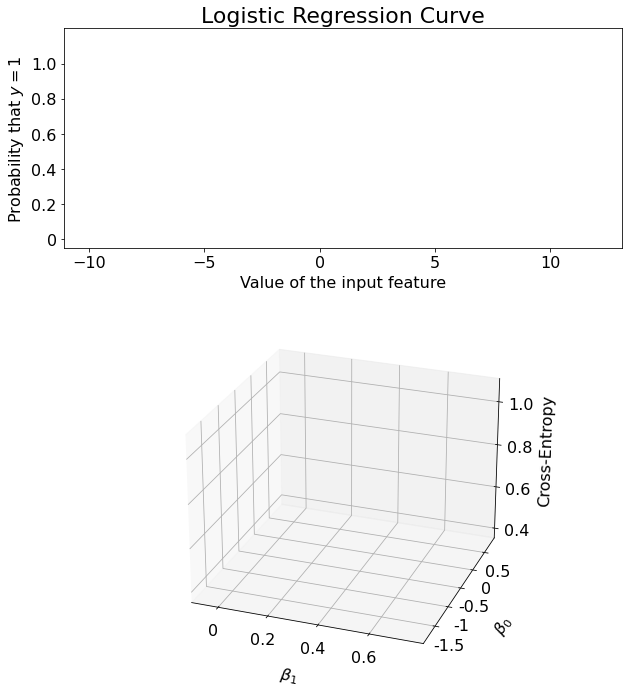

In [ ]:
# Regression curve
def pred_curve(xs,w0,b0):  # predict y-values for regression curve
    z=xs.T@w0.T  + b0   
    p=expit(z)  
    return p

# Create data for surface plot: 
def CrossEntropy_cost(x,y,w0,b0):  # returns costs for every pair of w and b. 
        p=expit(x @ w0.T + b0)
        return - np.mean(y*np.log(p) + (1-y)*np.log(1-p))

ws = np.linspace(-0.05, 0.75, 40) # set range of values for w ... 
bs = np.linspace(-1.75, 0.75, 40)  # ... and b for surface plot
M, B = np.meshgrid(ws, bs) # create meshgrid for surface plot
zs = np.array([CrossEntropy_cost(x_train,y_train,       # determine costs for each pair of w and b 
                       np.array([[wp]]), np.array([[bp]]))  # CrossEntropy_cost() only accepts wp and bp as matrices. 
               for wp, bp in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape) # get z-values for surface plot in shape of M.

# Define which epochs to plot: 
a1=np.arange(0,20,1).tolist() 
a2=np.arange(20,100,10).tolist()
a3=np.arange(100,500,100).tolist()
a4=np.arange(500,15000,100).tolist()
#a5=np.arange(40000,60000,20000).tolist()
points_ = a1+a2+a3+a4#+a5

# Create first animation (regression curve & surface plot):
fig = plt.figure(figsize=(10,12)) # create figure
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1.7]) # set height ratios of subplots

label_font_size = 16 # size of label fonts
tick_label_size= 16 # size of tick labels

# Customize subplots: 
ax0=fig.add_subplot(gs[0]) # add first subplot to figure
ax0.set_title("Logistic Regression Curve", fontsize=22) #set title
ax0.tick_params(axis='both', which='major', labelsize=tick_label_size) # set tick label size
ax0.set_xlabel("Value of the input feature", fontsize=label_font_size, labelpad=5) # set axis labels
ax0.set_ylabel("Probability that $y=1$", fontsize=label_font_size, labelpad=5)
ax0.tick_params(axis='both', which='major',
                labelsize=tick_label_size) 
ax0.set_ylim([-0.05, 1.2]) # set range for y-values in the plot
ax0.set_yticks([0,0.2,0.4,0.6,0.8, 1]) # set y-axis ticks
ax0.set_yticklabels(["0","0.2","0.4","0.6","0.8", "1.0"], # label y-ticks
                    fontsize=tick_label_size)
ax1=fig.add_subplot(gs[1], projection="3d") # add second subplot 
ax1.view_init(elev=25, azim=-70) # set view
ax1.set_xlabel("$\\beta_1$", fontsize=label_font_size, labelpad=16) 
ax1.set_ylabel("$\\beta_0$", fontsize=label_font_size, labelpad=16)
ax1.set_zlabel("Cross-Entropy", fontsize=label_font_size, labelpad=13)  
ax1.tick_params(axis='both', which='major', labelsize=tick_label_size) 
ax1.set_xticks([0, 0.2,0.4,0.6]) 
ax1.set_xticklabels(["0", "0.2","0.4","0.6"], fontsize=tick_label_size)
ax1.set_yticks([-1.5,-1, -0.5,0,0.5]) 
ax1.set_yticklabels(["-1.5","-1", "-0.5","0","0.5"], fontsize=tick_label_size)
ax1.set_zticks([0.4,0.6, 0.8,1.0]) 
ax1.set_zticklabels(["0.4","0.6", "0.8","1.0"], fontsize=tick_label_size)
ax1.tick_params(axis='z', pad=7, which='major', labelsize=tick_label_size) 
plt.tight_layout() # adjusts subplots to figure area

camera = Camera(fig)  # create camera 
for i in points_:
    
    # Plot logistic regression curve: 
    ys = pred_curve(xs,np.array([w.flatten()[i]]),b.flatten()[i]) #calculate y-values for reg. curve
    leg=ax0.plot(xs.flatten(),ys.flatten(),
                 color='r', label=str(i),lw=2,alpha=1)
    
    # Scatter plot of training data:
    ax0.scatter(x_train, y_train, color='b',marker='x', s=90) # plot training data points
    ax0.legend(leg,[f'costs: {np.round(c.flatten()[i],3)}'], # customize legend
               loc='upper left', fontsize=18)
    
    # Plot connecting lines (between predicted y-values and training data points):
    cl_=cl[i]
    for j in range(len(y_train)):    
        x,y = [x_train[j],x_train[j]],[float(y_train[j]),cl_[j]]
        ax0.scatter(x,y, color='black',s=0.5)
        ax0.plot(x,y, color='black', linewidth=1.5, 
                 linestyle='dashed', alpha=0.4)
        
    # Surface plot of costs:
    ax1.plot_surface(M, B, Z, rstride=1, cstride=1, 
                     alpha=0.80,cmap=cm.coolwarm) 
    
    # Plot trajectory of gradient descent:
    ax1.plot(w.flatten()[0:i],b.flatten()[0:i], 
             c.flatten()[0:i], linestyle="dashed",
             linewidth=2.5, color="black")
    ax1.scatter(w.flatten()[i],b.flatten()[i],   
                c.flatten()[i], marker="o",s=70*2, color="black")
    
    # Customize legend: 
    ax1.legend(leg,[f'iterations: {i}'], 
               loc='upper left', fontsize=18)
    
    camera.snap() # take snapshot after each frame/iteration
    
# Create animation: 
animation = camera.animate(interval = 500, # set delay between frames in milliseconds.
                          repeat = False, repeat_delay = 0) 

#print("Final weights: "+ str(w.flatten()[i]))    # 0.03579113198262307
#print("Final bias: "+ str(b[i]))                 # [-1.11258967]
#print("Final costs: " + str(c[i]))               # [0.40058369]

In [ ]:
xs

array([[ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
         1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
         2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
         3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
         4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
         5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
         6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
         7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
         8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
         9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ]])

In [ ]:
animation.save('LogisticRegression_Ex_1D.gif',writer='ffmpeg',fps=20,dpi=200)

In [ ]:
dat = np.concatenate([x_train,y_train],axis=1)

In [ ]:
import pandas as pd
df = pd.DataFrame(data=dat,columns=['Input Feature','Output Label'])

In [ ]:
df

,Input Feature,Output Label
0,-83,0
1,-71,0
2,-49,0
3,-39,0
4,-27,0
5,-15,0
6,-9,1
7,12,0
8,25,1
9,36,0
